## Detecting Translational Symmetry with Persistent Homology

If $\mathbb{R}^2$ is the group of translations on the euclidean plane, and $\Gamma$ is the subgroup of translations that map a tiling to itself, then $\mathbb{R}^2/\Gamma$ will be a torus. In this notebook, we will detect translational symmetry in images by sampling random translations, and taking snapshots through an $n\times n$ pixel lens. Each snapshot image is converted to a vector in $\mathbb{R}^{n\times n}$, creating a pixel embedding point cloud. We then use the Ripser python package to generate a persistent homology birth-death graph. We expect the persistent homology to indicate two $H_1$ homology classes over $Z_2$ and $Z_3$ for images with $C_1, C_2, C_3, C_4,$ and $C_6$ symmetry. 

In [1]:
# importing packages
from ripser import ripser
from persim import plot_diagrams
from numpy import pi,sin,cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from math import dist
from math import sqrt
from math import ceil
from PIL import Image
from PIL import ImageFilter
from IPython.display import display
import glob
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import paired_distances

In [24]:
# Code needed to create data and calculate persistent homology

# Given an image, a lens size, and a translation, translation_snapshot() 
# returns a snapshot after the translation is performed.
def translation_snapshot(img, lens_sz, translation):
    (a,b) = translation 
    translation = (-a,-b)
    (x,y) = upper_left_center(img, translation)
    (length, height) = img.size
    
    lens_corner_x = x - lens_sz/2.0 
    lens_corner_y = y - lens_sz/2.0 
    ret_img = img.crop((lens_corner_x,lens_corner_y, lens_corner_x+lens_sz, lens_corner_y+lens_sz))
    
    #make sure didn't fall off of the image
    (ret_length, ret_height) = ret_img.size
    if (lens_corner_x<0 or lens_corner_y<0 or lens_corner_x+lens_sz>length or lens_corner_y+lens_sz>height):
        print("I came off the page!")
        return False
    return ret_img

# Given a point with the origin at the center of the image, upper_left_center()
# returns the same point but with coordinates with an origin at the top left corner. 
# This is a helper function for translation_snapshot().
def upper_left_center(img, center):
    (x,y) = center
    (l, h) = img.size
    return (l/2.0+x , h/2.0 - y) 

# get_pixel_isom() converts a list of isometries into a list of the associated 
# pixel vector embeddings
def get_pixel_isom(isoms, img, lens):
    isom_images = []
    for iso in isoms:
        isom_images.append(translation_snapshot(img, lens, iso))
    ret_lst = []
    for elem in isom_images:
        arr = np.asarray(elem)
        arr = arr.reshape(-1)
        ret_lst.append(arr)
    ret_lst = np.asarray(ret_lst)
    return ret_lst

# generate a list of random isometries such that the lens does not fall off of the page
def generate_isoms(img, lens_sz, n_samples):
    lens_range = ((min(img.size)/sqrt(2))-lens_sz)/2.0
    x_trans = (lens_range*2*np.random.random(n_samples) - lens_range)
    y_trans = (lens_range*2*np.random.random(n_samples) - lens_range)
    isoms = []
    for i in range(n_samples):
        isoms.append((x_trans[i], y_trans[i]))
    return isoms

# generate a persistent homology graph with ripser and show the H1 intervals
def persistent_homology(img, lens_sz, n_samples, c):
    isoms = generate_isoms(img, lens_sz, n_samples)
    data = get_pixel_isom(isoms, img, lens_sz)
    
    # make persistent homology plot with ripser
    res = ripser(data, maxdim=1,  coeff =c)
    dgms = res['dgms']
    plt.figure(figsize = (4,4)) 
    plt.title("$\mathbb{Z} /$"+str(c)+"$\mathbb{Z}$")
    plot_diagrams(dgms)

    # see how many points are persisting
    H1 = res['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    print("largest 7 lengths of H1 intervals")
    print(d[:7])

## Point Group: $C_1$

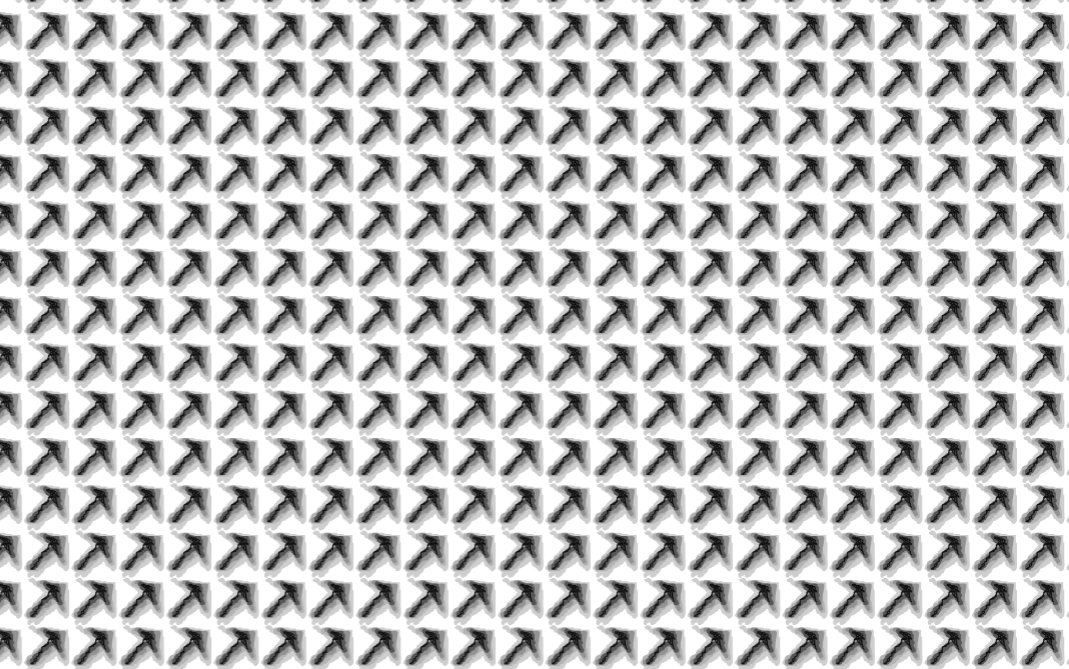

In [3]:
img = Image.open('images/C1gradientArrows.png')
img = img.convert('L')
display(img)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[10820.3984375, 9628.1474609375, 4333.21044921875, 4050.78125, 3889.84814453125, 3776.1455078125, 3670.70751953125]


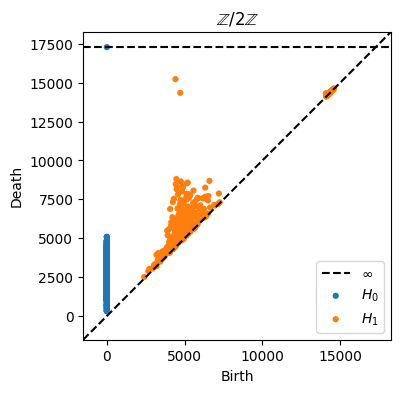

In [4]:
persistent_homology(img, 160, 1000, 2)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[10647.4560546875, 9726.74365234375, 4320.32373046875, 4129.826171875, 4013.52099609375, 3979.6591796875, 3560.44873046875]


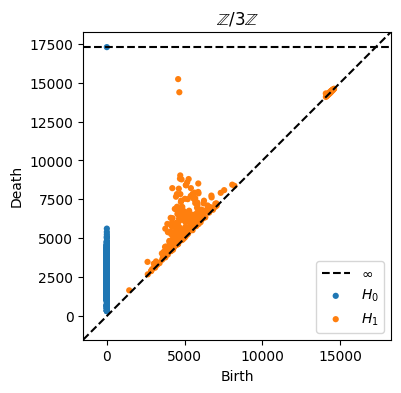

In [5]:
persistent_homology(img, 160, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!

## Point Group: $C_2$

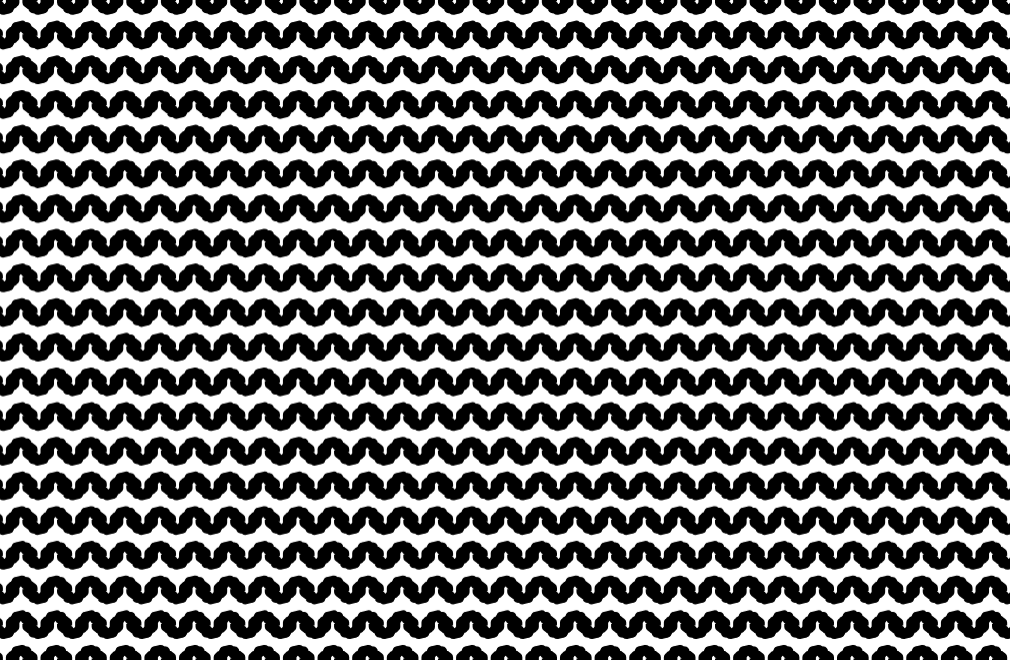

In [7]:
img = Image.open('images/C2sqiggle.png')
img = img.convert('L')
display(img)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[19131.384765625, 15298.5146484375, 6647.5517578125, 6414.923828125, 6147.92236328125, 6068.5947265625, 6019.341796875]


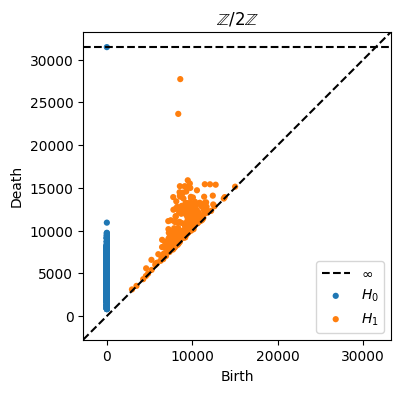

In [8]:
persistent_homology(img, 160, 1000, 2)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[19699.20068359375, 15525.66552734375, 7356.19921875, 7070.4990234375, 6879.84765625, 6818.771484375, 6708.83349609375]


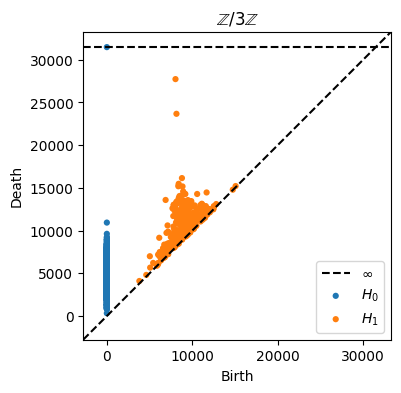

In [9]:
persistent_homology(img, 160, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!

## Point Group: $C_3$

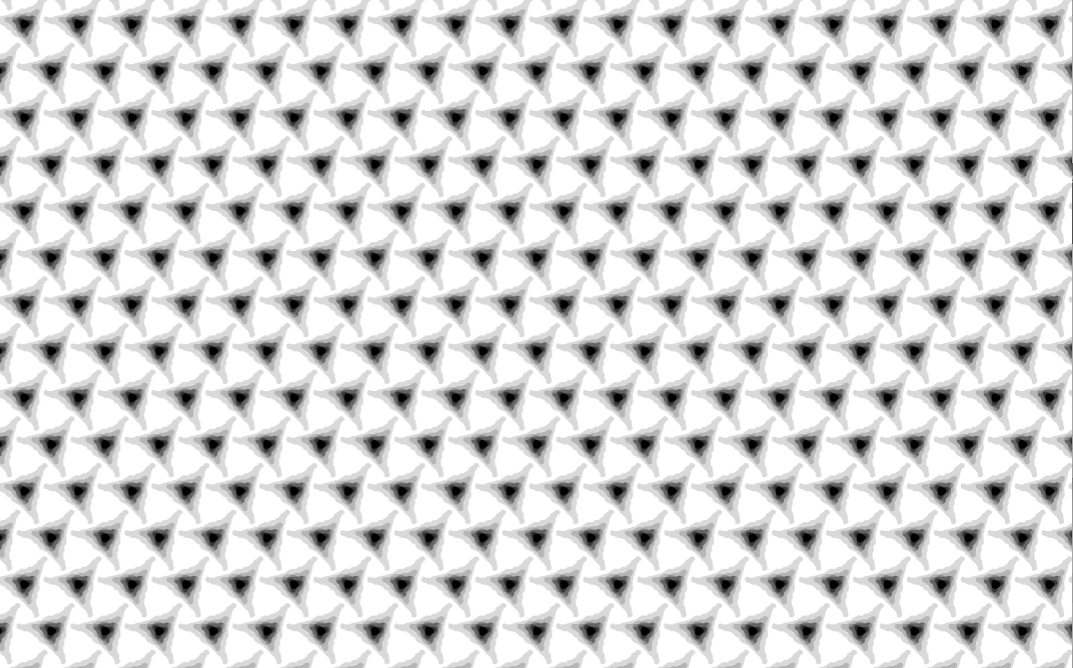

In [10]:
img = Image.open('images/C3gradient.png')
img = img.convert('L')
display(img)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[10306.190673828125, 9855.77734375, 2943.4931640625, 2800.721923828125, 2710.376708984375, 2510.394775390625, 2410.274658203125]


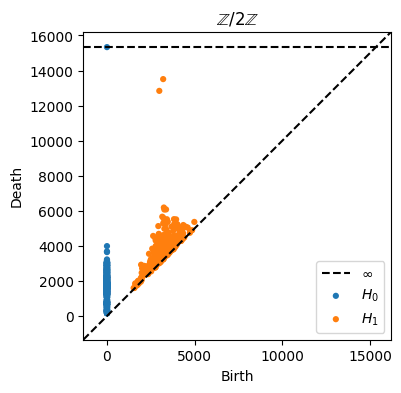

In [11]:
persistent_homology(img, 160, 1000, 2)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[10681.979248046875, 9908.223388671875, 2820.72119140625, 2702.09814453125, 2555.506591796875, 2519.927490234375, 2462.069091796875]


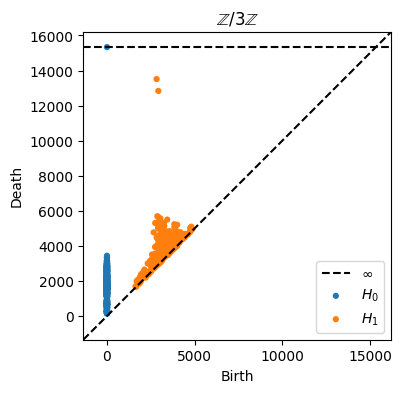

In [12]:
persistent_homology(img, 160, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!

## Point Group: $C_4$

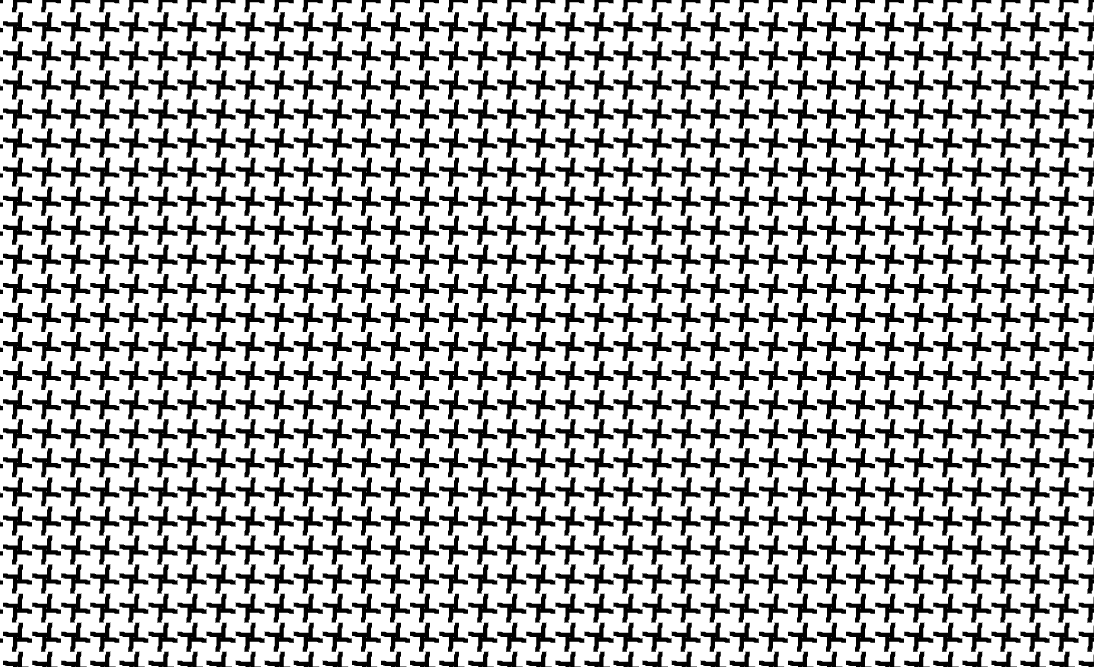

In [17]:
img = Image.open('images/C4pinwheel.png')
img = img.convert('L')
display(img)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[5112.39404296875, 4984.53173828125, 2957.62158203125, 2690.109375, 2629.65478515625, 2586.383056640625, 2546.24169921875]


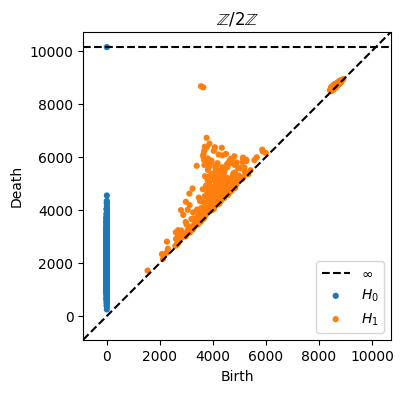

In [19]:
persistent_homology(img, 60, 1000, 2)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[4941.345458984375, 4902.7412109375, 2977.3837890625, 2689.550048828125, 2663.63818359375, 2580.755859375, 2535.9521484375]


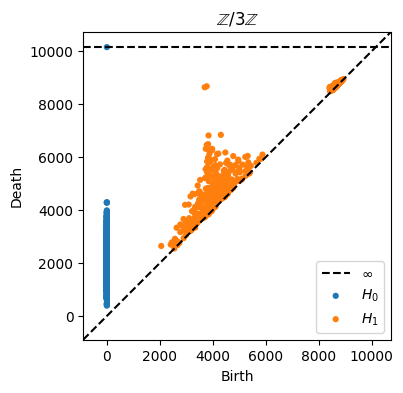

In [20]:
persistent_homology(img, 60, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!

## Point Group: $C_6$

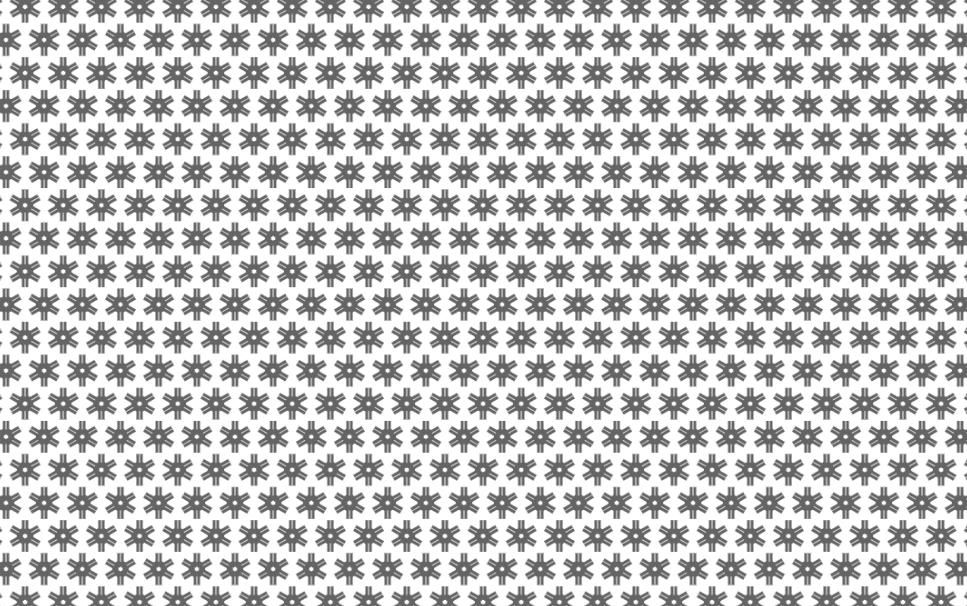

In [21]:
img = Image.open('images/C6 star.png')
img = img.convert('L')
display(img)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[2896.493408203125, 2691.44287109375, 1557.2607421875, 1541.80615234375, 1353.998291015625, 1337.40966796875, 1311.755615234375]


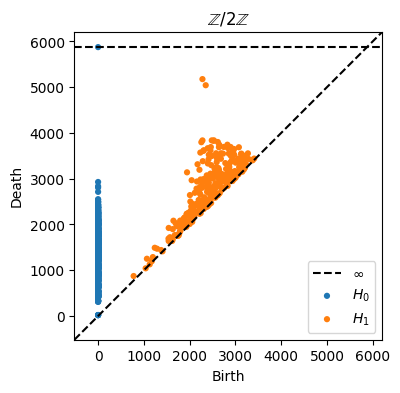

In [22]:
persistent_homology(img, 60, 1000, 2)

/Users/shannagoldman/anaconda3/envs/my-env/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


largest 7 lengths of H1 intervals
[2910.195068359375, 2633.22607421875, 1594.020751953125, 1537.44189453125, 1520.524658203125, 1439.734375, 1338.15966796875]


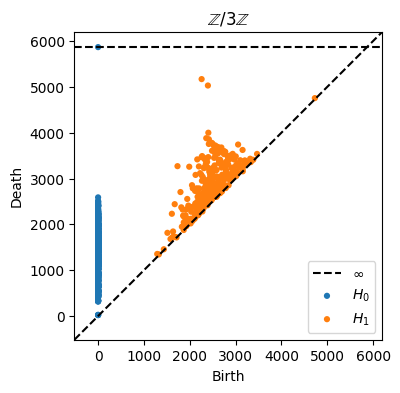

In [23]:
persistent_homology(img, 60, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!